In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

import graphviz
import gc

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train_8wry4cB.csv",header=0)
test = pd.read_csv("test_Yix80N0.csv",header=0)

testSession = test
#data = data[0:2]

In [3]:
print(data.shape)
print(data.columns)
print(data.describe(include='all'))
print(data.dtypes)


(10500, 5)
Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender'], dtype='object')
       session_id      startTime         endTime  \
count       10500          10500           10500   
unique      10500           8815            8803   
top        u22444  19/12/14 8:57  14/11/14 16:15   
freq            1              5               5   

                         ProductList  gender  
count                          10500   10500  
unique                          9402       2  
top     A00002/B00002/C00007/D00266/  female  
freq                              25    8192  
session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object


In [4]:
print(data.head)

<bound method NDFrame.head of       session_id       startTime         endTime  \
0         u16159  15/12/14 18:11  15/12/14 18:12   
1         u10253  16/12/14 14:35  16/12/14 14:41   
2         u19037  01/12/14 15:58  01/12/14 15:58   
3         u14556   23/11/14 2:57   23/11/14 3:00   
4         u24295  17/12/14 16:44  17/12/14 16:46   
...          ...             ...             ...   
10495     u15442   18/11/14 7:39   18/11/14 7:42   
10496     u17986  25/11/14 15:16  25/11/14 15:16   
10497     u22508  09/12/14 10:11  09/12/14 10:11   
10498     u17087  22/11/14 11:27  22/11/14 11:27   
10499     u23137   19/12/14 3:11   19/12/14 3:19   

                                             ProductList  gender  
0      A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female  
1      A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male  
2                           A00002/B00001/C00020/D16944/  female  
3      A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female  
4      A00

In [5]:
print(test.shape)
print(test.columns)
print(test.describe(include='all'))
print(test.dtypes)


(4500, 4)
Index(['session_id', 'startTime', 'endTime', 'ProductList'], dtype='object')
       session_id       startTime         endTime  \
count        4500            4500            4500   
unique       4500            4203            4144   
top        u12671  02/12/14 10:24  07/12/14 12:17   
freq            1               3               4   

                         ProductList  
count                           4500  
unique                          4207  
top     A00002/B00002/C00007/D00266/  
freq                              14  
session_id     object
startTime      object
endTime        object
ProductList    object
dtype: object


In [6]:
print(test.head)

<bound method NDFrame.head of      session_id       startTime         endTime  \
0        u12112  08/12/14 13:36  08/12/14 13:36   
1        u19725  19/12/14 13:52  19/12/14 13:52   
2        u11795  01/12/14 10:44  01/12/14 10:44   
3        u22639  08/12/14 20:19  08/12/14 20:22   
4        u18034  15/12/14 19:33  15/12/14 19:33   
...         ...             ...             ...   
4495     u23966  15/12/14 21:11  15/12/14 21:12   
4496     u20527   02/12/14 7:53   02/12/14 7:54   
4497     u13253  15/11/14 21:38  15/11/14 21:46   
4498     u17094   17/12/14 8:51   17/12/14 8:51   
4499     u24310  17/12/14 17:25  17/12/14 17:26   

                                            ProductList  
0                          A00002/B00003/C00006/D19956/  
1                          A00002/B00005/C00067/D02026/  
2                          A00002/B00002/C00004/D12538/  
3     A00002/B00003/C00079/D22781/;A00002/B00003/C00...  
4                          A00002/B00001/C00010/D23419/  
...      

In [7]:
data = data.drop(["session_id", "startTime", "endTime"], axis=1)
test = test.drop(["session_id", "startTime", "endTime"], axis=1)

print(data.shape)
print(test.shape)

(10500, 2)
(4500, 1)


In [8]:
# Getting all the products in train data

totalProd = []
for i in range(data.shape[0]):
    lst = (data['ProductList'][i].split(';'))
    for j in range(len(lst)):
        totalProd.extend(lst[j].split('/'))

print(len(totalProd))

totalProd = list(set(totalProd))
print(len(totalProd))
del lst
gc.collect

116255
16960


<function gc.collect(generation=2)>

In [9]:
print(totalProd[0:1])
totalProd = totalProd[1:]

['']


In [10]:
totalProd

['D31634',
 'D30435',
 'D14562',
 'D13354',
 'D00554',
 'D01789',
 'D05219',
 'D13213',
 'D03493',
 'D09272',
 'D08251',
 'D19278',
 'D25327',
 'D26458',
 'D28979',
 'D24763',
 'D19663',
 'D35179',
 'D05813',
 'D22707',
 'D07733',
 'D33674',
 'D17015',
 'D03656',
 'C00152',
 'D07344',
 'D30814',
 'D29660',
 'D09658',
 'D29064',
 'D17911',
 'D25913',
 'D01602',
 'D01538',
 'D13637',
 'D01447',
 'D24645',
 'D20600',
 'D24722',
 'D16101',
 'D12791',
 'D18132',
 'D09199',
 'D03699',
 'D08984',
 'D05846',
 'D00466',
 'D03210',
 'D05298',
 'D24245',
 'D07716',
 'D22716',
 'D07138',
 'D08463',
 'D03444',
 'D33204',
 'D35498',
 'D09535',
 'D30671',
 'D35079',
 'D21340',
 'D07682',
 'D24804',
 'D07546',
 'C00027',
 'D25472',
 'D20986',
 'D08469',
 'D01031',
 'D31151',
 'D15945',
 'D14516',
 'D07095',
 'D13376',
 'D02287',
 'D12088',
 'D10052',
 'D09814',
 'D34544',
 'D05269',
 'D02424',
 'D28561',
 'D03299',
 'D16222',
 'B00063',
 'D09506',
 'D16007',
 'C00319',
 'D35424',
 'D15618',
 'D35991',

In [13]:
%%time
# For each of the product in train data, create a column by the same name in test and train data. Assign value 0 to that
# column and change the type of the column as int8

for i in range(len(totalProd)):
    data[totalProd[i]] = 0
    test[totalProd[i]] = 0
    data[totalProd[i]] = data[totalProd[i]].astype('int8')
    test[totalProd[i]] = test[totalProd[i]].astype('int8')

print("after for loop")
print(data.shape)
print(test.shape)

after for loop
(10500, 16961)
(4500, 16960)
Wall time: 22min 35s


In [14]:
tempData = data
tempTest = test
print(data.shape)
print(test.shape)

(10500, 16961)
(4500, 16960)


In [16]:
data.dtypes

ProductList    object
gender         object
D31634           int8
D30435           int8
D14562           int8
                ...  
D05677           int8
D20951           int8
D20799           int8
D01595           int8
D05953           int8
Length: 16961, dtype: object

In [17]:
%%time
# if a product exists, then make the column corresponding to that product as 1. Do this operation for train data 

for i in range(data.shape[0]):
    rowProd = []
    lst = (data['ProductList'][i].split(';'))
    #print(lst)
    for j in range(len(lst)):
        rowProd.extend(lst[j].split('/'))
        #print(rowProd)
    rowProd = list(set(rowProd))
    size = len(rowProd)
    for k in range(size):
        data.at[i, rowProd[k]] = 1 

data = data.drop(data.columns[-1], axis =1)

del lst, rowProd
gc.collect

Wall time: 6.35 s


<function gc.collect(generation=2)>

In [18]:
%%time
# if a product exists, then make the column corresponding to that product as 1. Do this operation for test data 

for i in range(test.shape[0]):
    rowProd = []
    lst = (test['ProductList'][i].split(';'))
    #print(lst)
    for j in range(len(lst)):
        rowProd.extend(lst[j].split('/'))
        #print(rowProd)
    rowProd = list(set(rowProd))
    rowProd = [item for item in rowProd if item in totalProd]
    size = len(rowProd)
    for k in range(1, size):
        test.at[i, rowProd[k]] = 1

del lst, rowProd
gc.collect

Wall time: 10.3 s


<function gc.collect(generation=2)>

In [20]:
print(data.shape)
print(test.shape)

(10500, 16961)
(4500, 16960)


In [19]:
# saving one hot encoded data for future use

data.to_csv("data.csv")
test.to_csv('test.csv')

In [21]:
%%time

# deleting all the columns whose sum is less than 10. that is these products have been viewed by less than 10 users

dropped =0
dropList =[]
for i in totalProd:
    if data[i].sum() < 10 :
        dropped+=1
        dropList.append(i)


data = data.drop(dropList, axis=1)
test = test.drop(dropList, axis=1)

print("total dropped" + str(dropped))

total dropped16674
Wall time: 3.11 s


In [22]:
data.isnull().count()

ProductList    10500
gender         10500
C00152         10500
C00027         10500
D03244         10500
               ...  
C00011         10500
B00016         10500
C00298         10500
D12067         10500
C00055         10500
Length: 287, dtype: int64

In [23]:
Y = data['gender']
newData = data.drop(['gender', 'ProductList'], axis=1)
X = newData

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [27]:
%%time
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 35
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Wall time: 4min 36s


Wall time: 19.3 ms


Text(0, 0.5, 'Mean Error')

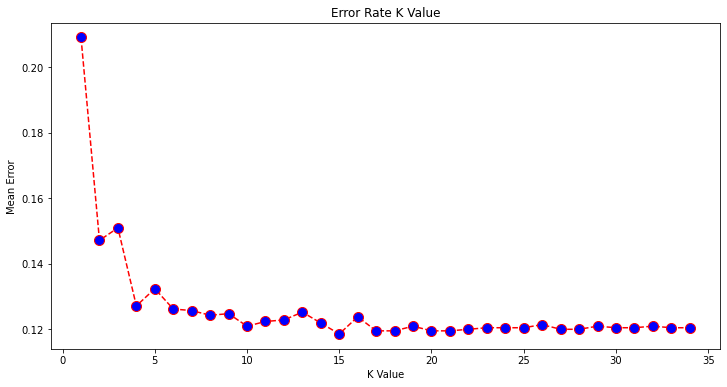

In [28]:
%%time

plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=15)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1600   68]
 [ 181  251]]
              precision    recall  f1-score   support

      female       0.90      0.96      0.93      1668
        male       0.79      0.58      0.67       432

    accuracy                           0.88      2100
   macro avg       0.84      0.77      0.80      2100
weighted avg       0.88      0.88      0.87      2100



In [30]:
newDataTest = test.drop(['ProductList'], axis=1)
testValidate = classifier.predict(newDataTest)

In [31]:
df = pd.DataFrame( testValidate, testSession['session_id'])
df.to_csv("resultsCategory.csv")

In [32]:
df[0].value_counts()

female    3807
male       693
Name: 0, dtype: int64